# **Feature Importance, LIME & SHAP**

## **Carregando e preparando a base**

In [51]:
# Carregando  as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Pima Indians Diabetes Dataset

Dados originalmente fornecidos pelo National Institute of Diabetes and Digestive and Kidney Diseases. O objetivo é predizer se um determinado paciente está propenso a ter diabetes ou não a partir de outros dados clínicos e laboratoriais.

Existem diversas restrições na seleção de observações. Este subconjunto dos dados contém apenas pacientes do sexo feminino com pelo menos 21 anos de idade e com descendência indígena Pima.

Variáveis:

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1)

In [52]:
# Carregando a base de dados
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('pima-indians-diabetes.csv')
pima.columns = col_names

In [53]:
pima

pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0           6      148  72    35        0  33.6     0.627   50      1
1           1       85  66    29        0  26.6     0.351   31      0
2           8      183  64     0        0  23.3     0.672   32      1
3           1       89  66    23       94  28.1     0.167   21      0
4           0      137  40    35      168  43.1     2.288   33      1
..        ...      ...  ..   ...      ...   ...       ...  ...    ...
763        10      101  76    48      180  32.9     0.171   63      0
764         2      122  70    27        0  36.8     0.340   27      0
765         5      121  72    23      112  26.2     0.245   30      0
766         1      126  60     0        0  30.1     0.349   47      1
767         1       93  70    31        0  30.4     0.315   23      0

[768 rows x 9 columns]

Avaliando o balanceamento da base

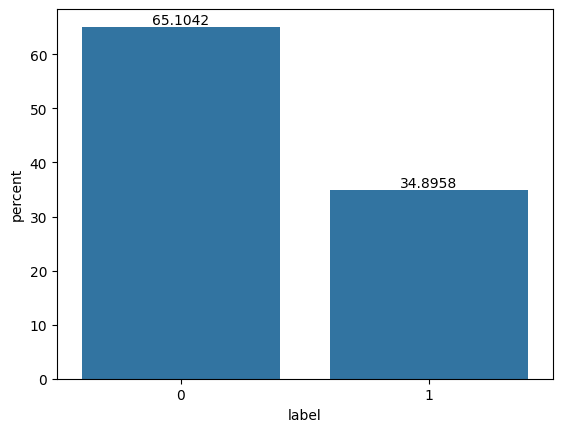

In [54]:
# Visualizando a distribuição da variável-alvo, em percentuais
ax = sns.countplot(pima, x='label', stat="percent")
ax.bar_label(ax.containers[0], fontsize=10);

In [55]:
# Separando o dataset em variáveis independentes e variável-alvo
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Variáveis independentes
y = pima.label # Variável-alvo

In [56]:
# Dividindo a base em conjuntos de Treino e Teste (70% Treino - 30% Teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## **Random Forest**

In [57]:
# Importando o classificador
from sklearn.ensemble import RandomForestClassifier

# Instanciando, treinando o modelo e aplicando o resultado na base de testes

# Instanciando o classificador
clf = RandomForestClassifier()

# Realizando o treino
clf.fit(X_train,y_train)

# Aplicando o modelo treinado no conjunto de Teste
y_pred = pd.DataFrame(clf.predict(X_test))

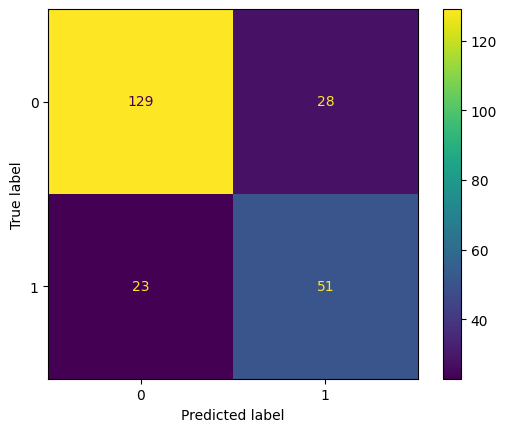

In [58]:
# Avaliando os resultados

# Matriz de confusão
# Linha: Real
# Coluna: Predito

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [59]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       157
           1       0.65      0.69      0.67        74

    accuracy                           0.78       231
   macro avg       0.75      0.76      0.75       231
weighted avg       0.78      0.78      0.78       231



### **Vamos avaliar a importância das variáveis (Feature Importance) no resultado da Random Forest**



In [60]:
clf.feature_importances_

array([0.09092599, 0.07953926, 0.17232694, 0.15411925, 0.28210499,
       0.0908518 , 0.13013178])

<BarContainer object of 7 artists>

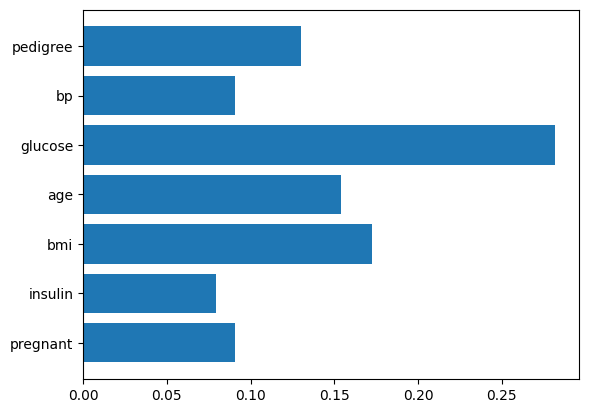

In [62]:
# Visualizando
plt.barh(feature_cols, clf.feature_importances_)

### **Executando a técnica LIME no resultado da Random Forest**

O LIME não vem pré-instalado no Colab. Vamos instalá-lo antes.

In [63]:
#pip install lime

In [64]:
# Importando o LIME
import lime
import lime.lime_tabular

X_XIA = X_train.values
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_XIA, feature_names=feature_cols, class_names=['No-Diabetes','Diabetes'], kernel_width=5)

In [65]:
# Avaliando a explicabilidade da observação #101 do conjunto de treino
instance = X_XIA[101]

# Capturando as predições para uso no método "explainer" do LIME.
predict_rf = lambda x: clf.predict_proba(x).astype(float)

exp = explainer_lime.explain_instance(instance, predict_rf, num_features=7)
exp.show_in_notebook(show_all=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [66]:
# Avaliando a explicabilidade da observação #301 do conjunto de treino
instance = X_XIA[302]

# Capturando as predições para uso no método "explainer" do LIME.
predict_rf = lambda x: clf.predict_proba(x).astype(float)

exp = explainer_lime.explain_instance(instance, predict_rf, num_features=7)
exp.show_in_notebook(show_all=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### **Executando a técnica SHAP no resultado da Random Forest**

O SHAP não vem pré-instalado no Colab. Vamos instalá-lo antes.

In [ ]:
#!pip install shap

In [67]:
# Importando a biblioteca
import shap

# "Fitando" o "Explicador" SHAP
explainer_shap = shap.Explainer(clf.predict, X_test)

# Calculando valores SHAP, pode demorar
shap_values = explainer_shap(X_test)

ExactExplainer explainer: 232it [00:32,  4.93it/s]


### **Visualizações SHAP**

**Bar Plot**

Os recursos são ordenados do maior para o menor efeito na previsão. Leva em consideração apenas o valor absoluto do SHAP, portanto não importa se a variável afeta a previsão de forma positiva ou negativa.

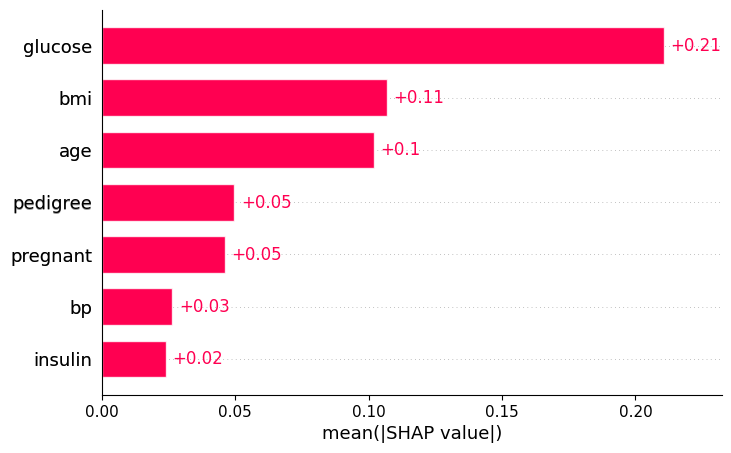

In [68]:
shap.plots.bar(shap_values)

**Summary plot: beeswarm**

No Summary plot (ou Beeswarm), as variáveis são ordenadas por seu efeito na previsão, mas também podemos ver como valores mais altos e mais baixos da variável afetarão o resultado.

Cada pequeno ponto no gráfico representa uma única observação. O eixo horizontal representa o valor SHAP, enquanto a cor do ponto nos mostra se aquela observação tem um valor maior ou menor, quando comparada com outras observações.

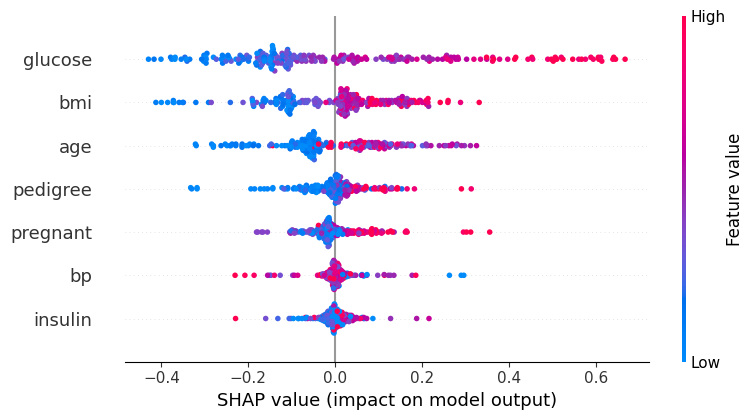

In [69]:
shap.summary_plot(shap_values)

# ou

#shap.plots.beeswarm(shap_values)

Neste exemplo, glicose baixa tem impacto negativo na previsão, enquanto valores mais altos têm um impacto positivo.

Já com a variável BP, valores altos têm impacto negativo, enquanto valores mais baixos têm impacto positivo na predição.

**Local bar plot**

Assim como fizemos na técnica LIME, podemos analisar o impactos das variáveis em observações específicas.

O gráfico nos mostra quais são as principais características que afetam a previsão de uma única observação e a magnitude do valor SHAP para cada característica.

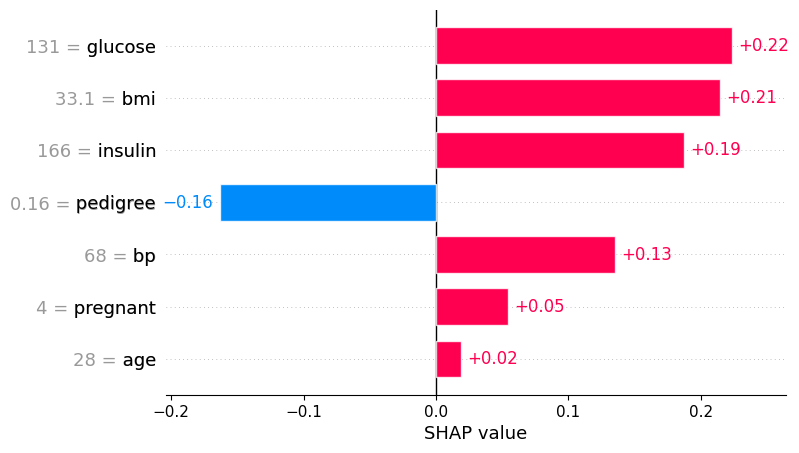

In [70]:
# Avaliando a observação 11 do conjunto de treino

shap.plots.bar(shap_values[11])

**Force plot**

O gráfico de força é outra maneira de ver o efeito que cada característica tem na previsão, para uma determinada observação. Neste gráfico, os valores SHAP positivos são exibidos no lado esquerdo e os negativos no lado direito, como se estivessem competindo entre si. O valor destacado é a previsão para essa observação.

In [73]:
## Load JS visualization code to notebook
shap.initjs()

shap.plots.force(shap_values[11])

## **Gradient Boosting**

In [74]:
# Importando o classificador
from sklearn.ensemble import GradientBoostingClassifier

# Instanciando, treinando o modelo e aplicando o resultado na base de testes

# Instanciando o classificador
clf_gb = GradientBoostingClassifier()

# Realizando o treino
clf_gb.fit(X_train,y_train)

# Aplicando o modelo treinado no conjunto de Teste
y_pred = pd.DataFrame(clf_gb.predict(X_test))

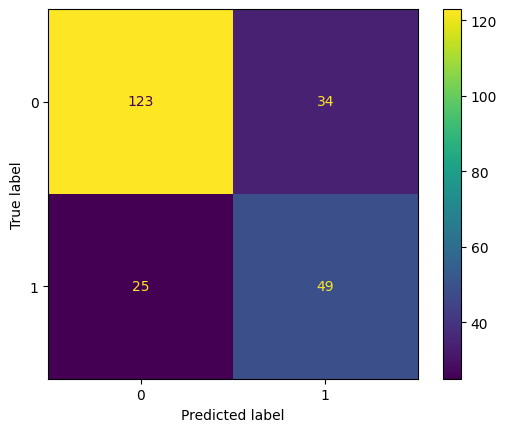

In [75]:
# Avaliando os resultados

# Matriz de confusão
# Linha: Real
# Coluna: Predito

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_gb.classes_)
disp.plot()

In [76]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       157
           1       0.59      0.66      0.62        74

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.75      0.74      0.75       231



### **Vamos avaliar a importância das variáveis (Feature Importance) no resultado do Gradient Boosting**

<BarContainer object of 7 artists>

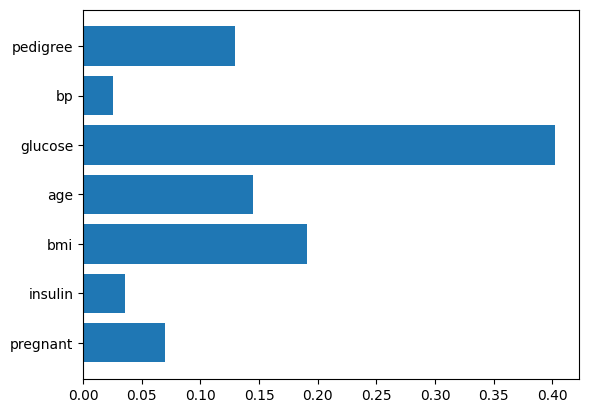

In [77]:
import matplotlib.pyplot as plt

# Visualizando
plt.barh(feature_cols, clf_gb.feature_importances_)

### **Executando a técnica LIME no resultado do Gradient Bosting**

In [78]:
# Importando o LIME
import lime
import lime.lime_tabular

X_XIA = X_train.values
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_XIA, feature_names=feature_cols, class_names=['No-Diabetes','Diabetes'], kernel_width=5)

In [79]:
import lime

# Avaliando a explicabilidade da observação #101
instance = X_XIA[101]

# Capturando as predições para uso no método "explainer" do LIME.
predict_gb = lambda x: clf_gb.predict_proba(x).astype(float)

exp = explainer_lime.explain_instance(instance, predict_gb, num_features=7)
exp.show_in_notebook(show_all=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Avaliando a explicabilidade da observação #101
instance = X_XIA[301]

exp = explainer_lime.explain_instance(instance, predict_gb, num_features=7)
exp.show_in_notebook(show_all=False)

### **Executando a técnica SHAP no resultado do Gradient Boosting**

In [80]:
# Importando a biblioteca
import shap

# "Fitando" o "Explicador" SHAP
explainer_shap = shap.Explainer(clf_gb.predict, X_test)

# Calculando valores SHAP, pode demorar
shap_values = explainer_shap(X_test)

### **Visualizações SHAP**

**Bar Plot**

In [81]:
shap.plots.bar(shap_values)

**Summary plot: beeswarm**

In [82]:
#shap.summary_plot(shap_values)

# ou

shap.plots.beeswarm(shap_values)

**Local bar plot**

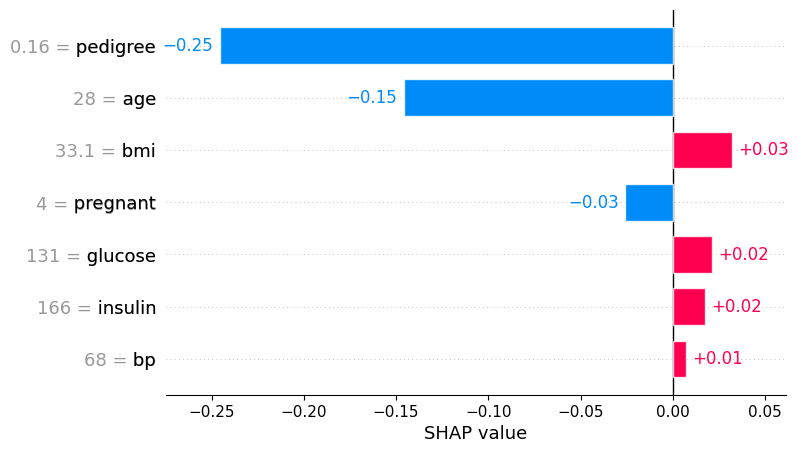

In [83]:
# Avaliando a observação 11 do conjunto de treino

shap.plots.bar(shap_values[11])

**Force plot**

In [84]:
## Load JS visualization code to notebook
shap.initjs()

shap.plots.force(shap_values[11])

## **XGBoost**

In [85]:
# Importando o classificador
from xgboost import XGBClassifier

# Instanciando, treinando o modelo e aplicando o resultado na base de testes

# Instanciando o classificador
xgb_clf = XGBClassifier()

# Realizando o treino
xgb_clf.fit(X_train,y_train)

# Aplicando o modelo treinado no conjunto de Teste
y_pred = pd.DataFrame(xgb_clf.predict(X_test))

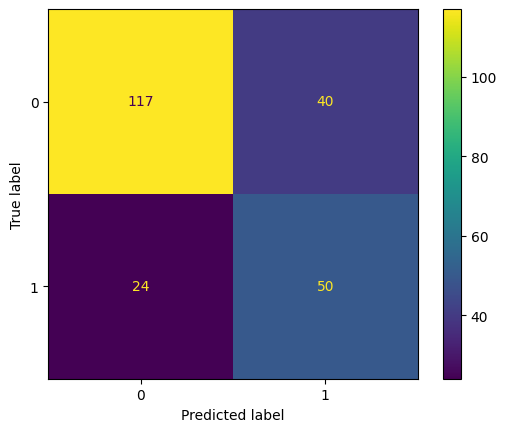

In [86]:
# Avaliando os resultados

# Matriz de confusão
# Linha: Real
# Coluna: Predito

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_clf.classes_)
disp.plot()

In [87]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       157
           1       0.56      0.68      0.61        74

    accuracy                           0.72       231
   macro avg       0.69      0.71      0.70       231
weighted avg       0.74      0.72      0.73       231



### **Vamos avaliar a importância das variáveis (Feature Importance) no resultado do XGBoost**

<BarContainer object of 7 artists>

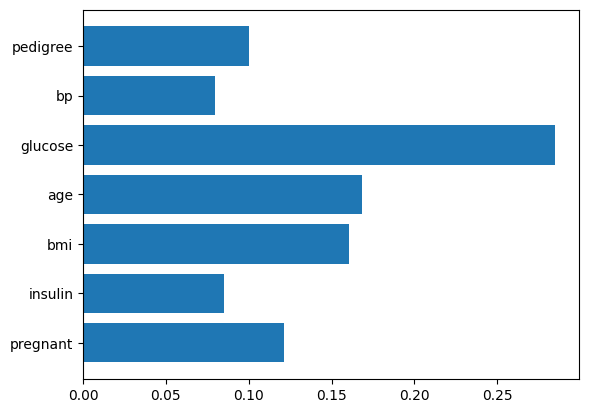

In [88]:
import matplotlib.pyplot as plt

# Visualizando
plt.barh(feature_cols, xgb_clf.feature_importances_)

### **Executando a técnica LIME no resultado do Gradient Bosting**

In [89]:
# Importando o LIME
import lime
import lime.lime_tabular

X_XIA = X_train.values
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_XIA, feature_names=feature_cols, class_names=['No-Diabetes','Diabetes'], kernel_width=5)

In [90]:
# Avaliando a explicabilidade da observação #101
instance = X_XIA[101]

# Capturando as predições para uso no método "explainer" do LIME.
predict_gb = lambda x: xgb_clf.predict_proba(x).astype(float)

exp = explainer_lime.explain_instance(instance, predict_gb, num_features=7)
exp.show_in_notebook(show_all=False)

In [91]:
# Avaliando a explicabilidade da observação #101
instance = X_XIA[301]

# Capturando as predições para uso no método "explainer" do LIME.
predict_gb = lambda x: clf.predict_proba(x).astype(float)

exp = explainer_lime.explain_instance(instance, predict_rf, num_features=7)
exp.show_in_notebook(show_all=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### **Executando a técnica SHAP no resultado do XGBoost**

In [92]:
# Importando a biblioteca
import shap

# "Fitando" o "Explicador" SHAP
explainer_shap = shap.Explainer(xgb_clf.predict, X_test)

# Calculando valores SHAP, pode demorar
shap_values = explainer_shap(X_test)

ExactExplainer explainer: 232it [00:10,  1.70s/it]                         


### **Visualizações SHAP**

**Bar Plot**

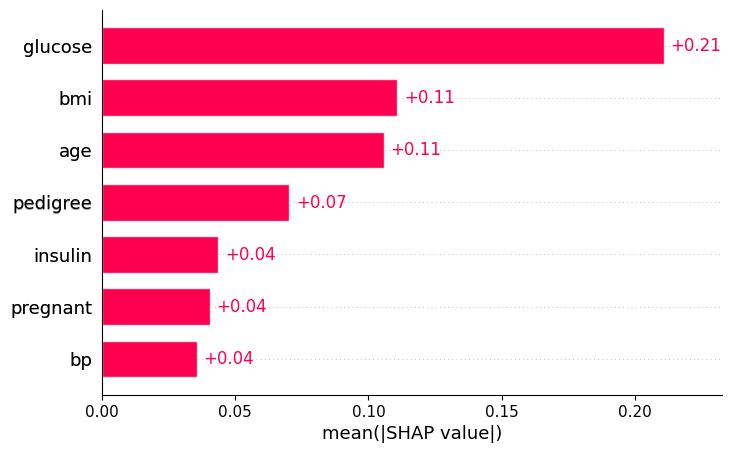

In [93]:
shap.plots.bar(shap_values)

**Summary plot: beeswarm**

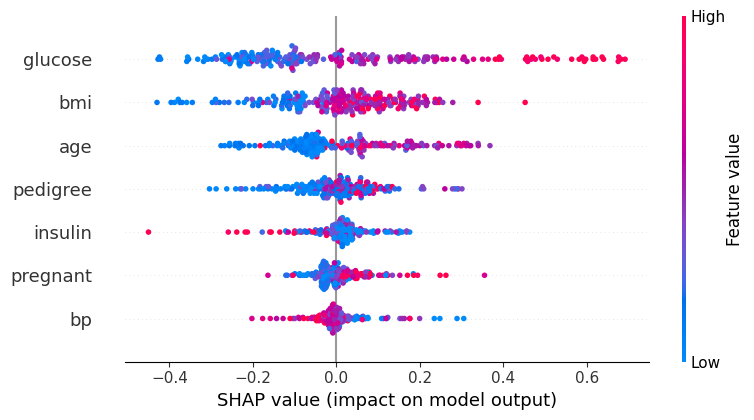

In [94]:
shap.summary_plot(shap_values)

# ou

#shap.plots.beeswarm(shap_values)

**Local bar plot**

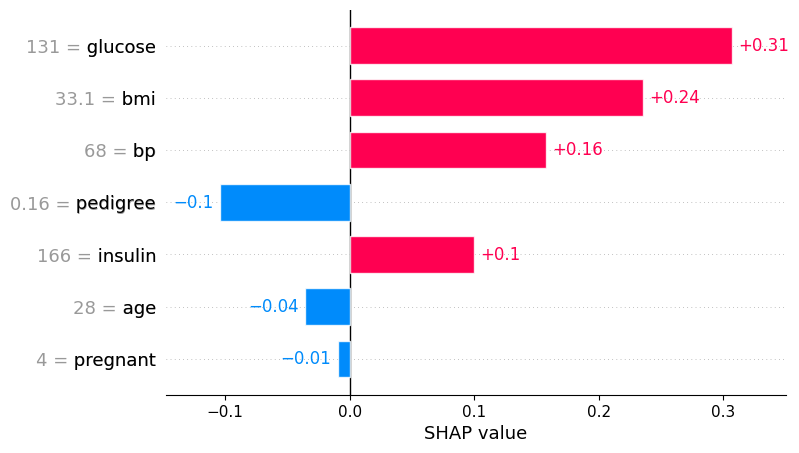

In [95]:
# Avaliando a observação 11 do conjunto de treino

shap.plots.bar(shap_values[11])

**Force plot**

In [96]:
## Load JS visualization code to notebook
shap.initjs()

shap.plots.force(shap_values[11])